In [ ]:
# Provided by Somayeh Komeylian: PhD Student at UCSD & SDSU #
# Deep Learning #

# Type of dataset: binary classfication. The dataset is the train.csv file, which is attached to this ZIP file.
# Please change the file path in the following line of code to reflect your own path: 
# train = pd.read_csv(r"C:\Users\komey\OneDrive\Desktop\Summer_classes\Deep Learning\DLSession 1/train.csv") 

# Method: an 2-layered neural network. 
# This project involves building an 2-layered neural network from scratch using Python and the NumPy library, without using any built-in deep learning libraries.

In [77]:
# Different Types of Activation Functions:
    # 1. Linear Activation Function
    # 2. Binary Step Activation Function
    # 3. Non-linear Activation Functions
    # 4. Sigmoid Activation Function
    # 5. Hyperbolic Tangent (TanH) Activation Function
    # 6. Rectified Linear Unit (ReLU) Activation Function
    # 7. Leaky ReLU Activation Function
    # 8. Exponential Linear Units (ELUs) Activation Function
    # 9. Softmax Activation Function
    # 10. Swish Activation Function
    # 11. SoftSign Activation Function

In [27]:
# Different Types of Losses:
# https://www.geeksforgeeks.org/deep-learning/loss-functions-in-deep-learning/ #

# 1. Regression Loss Functions
    # 1.1. Mean Squared Error (MSE) Loss
    # 1.2. Mean Absolute Error (MAE) Loss
    # 1.3. Huber Loss

# 2. Classification Loss Functions
    # 2.1. Binary Cross-Entropy Loss (Log Loss)
    # 2.2. Categorical Cross-Entropy Loss
    # 2.3. Sparse Categorical Cross-Entropy Loss
    # 2.4. Kullback-Leibler Divergence Loss (KL Divergence)
    # 2.5. Hinge Loss

# 3. Ranking Loss Functions
    # 3.1. Contrastive Loss
    # 3.2. Triplet Loss
    # 3.3. Margin Ranking Loss

# 4. Image and Reconstruction Loss Functions
    # 1. Pixel-wise Cross-Entropy Loss
    # 2. Dice Loss
    # 3. Jaccard Loss (Intersection over Union, IoU)
    # 4. Perceptual Loss
    # 5. Total Variation Loss

# 5. Adversarial Loss Functions
    # 5.1. Adversarial Loss (GAN Loss)
    # 5.2. Least Squares GAN Loss

# 6. Specialized Loss Functions
# 6.1. CTC Loss (Connectionist Temporal Classification)
# 6.2. Poisson Loss
# 6.3. Cosine Proximity Loss
# 6.4. Earth Mover's Distance (Wasserstein Loss)


# How to Choose the Right Loss Function?
# Choosing the right loss function is very important for training a deep learning model that works well. Here are some guidelines to help you make the right choice:
### 1. Understand the Task : The first step in choosing the right loss function is to understand what your model is trying to do. 
# Use MSE or MAE for regression, Cross-Entropy for classification, Contrastive or Triplet Loss for ranking and Dice or Jaccard Loss for image segmentation.
### 2. Consider the Output Type: You should also think about the type of output your model produces. 
# If the output is a continuous number use regression loss functions like MSE or MAE, classification losses for labels and CTC Loss for sequence outputs like speech or handwriting.
### 3. Handle Imbalanced Data: If your dataset is imbalanced one class appears much more often than others it's important to use a loss function that can handle this. 
# Focal Loss is useful for such cases because it focuses more on the harder-to-predict or rare examples and help the model learn better from them.
### 4. Robust to Outliers: When your data has outliers it’s better to use a loss function that’s less sensitive to them. 
# Huber Loss is a good option because it combines the strengths of both MSE and MAE and make it more robust and stable when outliers are present.
### 5. Performance and Convergence: Choose loss functions that help your model converge faster and perform better. 
# For example using Hinge Loss for SVMs can sometimes lead to better performance than Cross-Entropy for classification.

# Loss function helps in evaluation and optimization. 
# Understanding different types of loss functions and their applications is important for designing effective deep learning models.

In [1]:
################## Step 1: Import all the required Libraries ##################
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd

In [2]:
################ Step 2: Reading (or Loading) the dataset: #################
# Load the content of a specific CSV file into a pandas DataFrame named train and then prints the first five rows of that DataFrame to the console or notebook output
train = pd.read_csv(r"C:\Users\komey\OneDrive\Desktop\Summer_classes\Deep Learning\DLSession 1/train.csv")
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
################# Step 3: Inspect Data Types: #################

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
################# Step 3: Inspect Data Types: #################

train.shape

(42000, 785)

In [5]:
################# Step 4: Data cleaning and preprocessing: #################

X = train[train['label'].isin([0,1])]
# This line creates a new DataFrame called X.
# It selects all rows from the original train DataFrame where the value in the 'label' column is either 0 or 1. 
# This is a common practice when dealing with a binary classification problem (two possible outcomes) and filtering out other potential classes or data points.

### Further Explanation: 
# This code effectively creates a new dataset X containing only the samples belonging to classes 0 and 1. 
# This is a common step when preparing data for a binary classification task, especially if the original dataset contained more classes. 


Y = train[train['label'].isin([0,1])]['label']
# Target variable Y (a pandas Series)
# This code creates a new variable Y containing a binary classification target variable (labels 0 and 1) by filtering out all other labels from the original train data. 
# This is a common step when preparing data for a binary classification model (e.g., logistic regression) that only accepts labels 0 or 1.


X = X.drop(['label'], axis = 1)
# remove the label from X
# This code uses the pandas library to remove a column named 'label' from a DataFrame called X. 
# The axis=1 argument specifies that the operation should be performed on columns, while the ['label'] part indicates the specific column to be dropped. 
# The result is a new DataFrame X without the 'label' column, because the result of the drop() function is assigned back to X. 
# axis=1: This crucial argument tells pandas to look for and remove a column. 
# axis=0 would remove a row, so axis=1 is used for columns.

In [6]:
################# Step 4: Data cleaning and preprocessing: #################

X

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41986       0       0       0       0       0       0       0       0       0   
41988       0       0       0       0       0       0       0       0       0   
41991       0       0       0       0       0       0       0       0       0   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
5           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41986       0  ...         0         0         0         0         0   
41988       0  ...         0         0         0         0         0   
41991       0  ...         0         0         0         0         0   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
4             0         0         0         0         0  
5             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41986         0         0         0         0         0  
41988         0         0         0         0         0  
41991         0         0         0         0         0  
41995         0         0         0         0         0  
41996         0         0         0         0         0  

[8816 rows x 784 columns]

In [7]:
################# Step 4: Data cleaning and preprocessing: #################

Y

0        1
1        0
2        1
4        0
5        0
        ..
41986    0
41988    0
41991    1
41995    0
41996    1
Name: label, Length: 8816, dtype: int64

In [8]:
################# Step 5: Neural Network Implementation from Scratch: #################
################# 5.1. Activation Functions

# Helper function for sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
################# Step 5: Neural Network Implementation from Scratch: #################
################# 5.2. Initialize Parameters for an 2-layered neural network

# Function to initialize network parameters (weights and biases)
def define_network_parameters(n_x, n_y, nodes):
    # Initialize weights with small random values and biases with zeros
    # 'nodes' is the size of the hidden layer
    params = {}
    params['W1'] = np.random.randn(nodes, n_x) * 0.01  # Random initializations for weights
    params['b1'] = np.zeros((nodes, 1))                # Zero initialization for biases
    params['W2'] = np.random.randn(n_y, nodes) * 0.01  # Random initializations for weights
    params['b2'] = np.zeros((n_y, 1))                  # Zero initialization for biases
    return params

In [ ]:
################# Step 5: Neural Network Implementation from Scratch: #################
################# 5.3. Forward propagation

# Function for forward propagation
def forward_propagation(X, params):
    # Retrieve parameters
    W1, b1 = params['W1'], params['b1']
    W2, b2 = params['W2'], params['b2']

    # Layer 1: Linear -> Tanh activation (a common choice for hidden layers)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1) # Tanh activation function

    # Layer 2: Linear -> Sigmoid activation (for binary classification output)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2) # Sigmoid activation function

    results = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return results

In [11]:
################# Step 5: Neural Network Implementation from Scratch: #################
################# 5.4. Cost/Losss Function for the binary classification

# Function to calculate the error (cost function - Binary Cross-Entropy)
def network_error(A2, Y):
    m = Y.shape[1] # Number of examples

    # Calculate the cross-entropy cost (log loss)
    # Add a small value (epsilon) to log to avoid log(0)
    logprobs = np.multiply(np.log(A2 + 1e-15), Y) + np.multiply(np.log(1 - A2 + 1e-15), (1 - Y))
    cost = -1/m * np.sum(logprobs)
    cost = np.squeeze(cost) # Ensure cost is a single number
    return cost

In [12]:
################# Step 5: Neural Network Implementation from Scratch: #################
################# 5.5. Backward Propagation 

# Function for backward propagation (calculates gradients)
def backward_propagation(params, results, X, Y):
    m = X.shape[1] # Number of examples
    W2 = params['W2']
    A1 = results['A1']
    A2 = results['A2']

    # Backpropagation for output layer (sigmoid and cross-entropy)
    dZ2 = A2 - Y # Derivative of cost with respect to Z2 (simplified for sigmoid/cross-entropy combo)
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    # Backpropagation for hidden layer (tanh)
    # dZ1 = derivative of cost with respect to Z1
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2)) # Derivative of tanh is 1 - tanh^2(Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    derivatives = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return derivatives

In [13]:
################# Step 5: Neural Network Implementation from Scratch: #################
################# 5.6. Update Parameters

# Function to update parameters using gradient descent
def update_parameters(params, derivatives, learning_rate=0.01):
    # Update rule: parameter = parameter - learning_rate * derivative
    params['W1'] -= learning_rate * derivatives['dW1']
    params['b1'] -= learning_rate * derivatives['db1']
    params['W2'] -= learning_rate * derivatives['dW2']
    params['b2'] -= learning_rate * derivatives['db2']
    return params

In [14]:
################# Step 5: Neural Network Implementation from Scratch: #################
################# 5.7. Main neural network model function

def neural_network(X, Y, nodes, num_iterations=100, learning_rate=0.01):

    n_x = X.shape[0]
    n_y = Y.shape[0]

    params = define_network_parameters(n_x, n_y, nodes)
    err = []

    for i in range(0, num_iterations):
        results = forward_propagation(X, params)
        error = network_error(results['A2'], Y)
        derivatives = backward_propagation(params, results, X, Y)
        params = update_parameters(params, derivatives)
        err.append(error)
    plt.plot(np.array(err))
    return params

In [15]:
################# Step 6: Data Preparation as described in the query: #################

x = X.T.values
# x = X.T.values: This line suggests that the original X might be a pandas DataFrame where the features are in rows, and the samples in columns (an unusual orientation). 
# X.T transposes the DataFrame so that samples are in rows and features in columns, which is the standard scikit-learn format of (n_samples, n_features).
#  .values converts this transposed DataFrame into a NumPy array.

y = Y.T.values
# Similar to X, this transposes and converts the target variable Y (likely a pandas Series or a single-column DataFrame) into a NumPy array.

y = y.reshape(1, Y.size)
# The code y = y.reshape(1, Y.size) is used to reshape a 1-dimensional array y into a 2-dimensional array with one row and Y.size columns. 
# This reshaping is often necessary when working with certain Scikit-learn models or other libraries that expect a specific input shape for target variables (y).

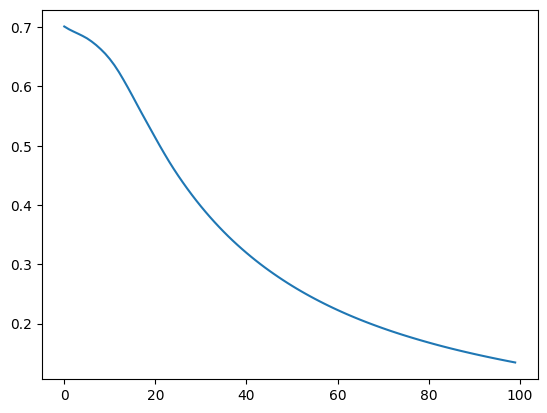

In [16]:
################# Step 7: Initialize the neural network model: #################

import numpy as np
import matplotlib.pyplot as plt

model = neural_network(x, y, 10, 100)
# The code model = neural_network(x, y, 10, 100) initializes and possibly trains a neural network model
#### x: The input data or feature set used for training the network. This is typically a matrix or array where each row is a data sample and each column is an input feature.
#### y: The target labels or output values that the network aims to predict (for supervised learning). This corresponds to the input data in x.
#### 10: This parameter likely defines part of the neural network's architecture, such as the number of nodes
#### 100: This parameter most likely specifies the number of training iterations or epochs (complete passes over the entire training dataset).
#### The function returns a model object, which is the trained or initialized neural network structure ready to be used for predictions on new data

In [18]:

################# Step 8: Predictions within the 2-layered neural network: #################

def predict(parameters, X):
   
    results = forward_propagation(X, parameters)
    # 1. Perform forward propagation using the given parameters and input data.
    #    'forward_propagation' is a custom function (not provided here)
    #    that calculates the activations and outputs of a neural network.

    print(results['A2'][0])
    # 2. Print the first element of the 'A2' output from the forward propagation.
    #    'A2' likely represents the activation of the second layer in the network,
    #    or the final output before rounding for binary classification.

    predictions = np.around(results['A2'])
    # 3. Round the 'A2' output to the nearest integer to obtain binary predictions.
    #    This suggests 'A2' contains values between 0 and 1 (e.g., from a sigmoid activation),
    #    and rounding converts them to 0 or 1 for classification.
    return predictions
    # 4. Return the calculated binary predictions.

predictions = predict(model, x)
# The usage of the predict function:
# 'model' would be the trained parameters of your neural network.
# 'x' would be the input data for which you want to make predictions.

# this predict function orchestrates the use of a pre-trained neural network (defined by parameters) to generate class predictions 
# for new input data X by performing a forward pass and then converting the continuous output activations into discrete class labels. 
# It's a fundamental component of using a trained neural network for inference.

accuracy = float(np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / float(y.size) * 100
print(f"Accuracy: {accuracy:.2f}%")

[0.8816728  0.12774688 0.8816728  ... 0.8816728  0.12774688 0.8816728 ]
Accuracy: 99.88%


C:\Users\komey\AppData\Local\Temp\ipykernel_24108\1456483376.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float(np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / float(y.size) * 100


In [19]:
################# Step 8: Evaluating the performance of a classification model : #################

accuracy = float(np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / float(y.size) * 100
# This calculates the number of True Positives (TP)

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 99.88%


C:\Users\komey\AppData\Local\Temp\ipykernel_24108\2710919110.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float(np.dot(y, predictions.T) + np.dot(1 - y, 1 - predictions.T)) / float(y.size) * 100


In [20]:
################# Step 8: Evaluating the performance of a classification model : #################

X.loc[0,:].T.values

# The code X.loc[0,:].T.values is a sequence of pandas and NumPy operations used to extract the data of the first sample (row) from a DataFrame X as a 1-dimensional NumPy array.
# It in a scikit-learn context typically refers to extracting the feature values for the first data sample (X.loc[0,:]) 
# and converting them into a NumPy array (.values) with the correct shape for processing by sklearn models. 

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [21]:
################# Step 8: Evaluating the performance of a classification model : #################

y 

array([[1, 0, 1, ..., 1, 0, 1]], shape=(1, 8816))